In [1]:
import numpy as np
import math
import pandas as pd
import tensorflow as tf
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError

In [2]:
# For day.csv
# data_path = 'Bike-Sharing-Dataset/day.csv'
# For hour.csv
data_path = 'Bike-Sharing-Dataset/hour.csv'
rides = pd.read_csv(data_path)

# Shuffling DataFrame
rides = shuffle(rides)

<AxesSubplot:xlabel='dteday'>

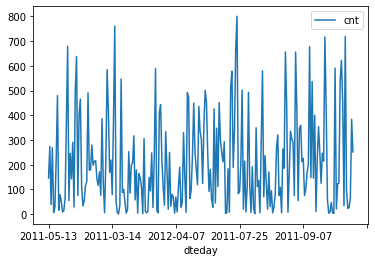

In [3]:
rides[:24*10].plot(x='dteday', y='cnt')

In [196]:
# Encoding categorical variables

# For day.csv
# dummy_fields = ['season', 'weathersit', 'mnth', 'weekday']

# For hour.csv
dummy_fields = ['season', 'weathersit', 'mnth', 'weekday', 'hr']

for each in dummy_fields:
    dummies = pd.get_dummies(rides[each], prefix=each, drop_first=False)
    rides = pd.concat([rides,dummies], axis=1)

In [197]:
# Deleting those columns that has not use in the dataset

# For day.csv
# fields_to_drop = ['instant', 'dteday', 'season', 'weathersit', 'weekday', 'atemp', 'mnth', 'workingday']

# For hour.csv
fields_to_drop = ['instant', 'dteday', 'season', 'weathersit', 'weekday', 'atemp', 'mnth', 'workingday', 'hr']
data = rides.drop(fields_to_drop, axis=1)

In [198]:
# Zero mean and a standard deviation of 1
quant_features = ['casual', 'registered', 'temp', 'hum', 'windspeed']
scaled_features = {}

for each in quant_features:
    mean, std = data[each].mean(), data[each].std()
    scaled_features[each] = [mean, std]
    data.loc[:, each] = (data[each] - mean)/std

In [199]:
# Dividing the data into Test and Train
test_data = data[-21*24:]
data = data[:-21*24]
target_fields = ['cnt']
features, targets = data.drop(target_fields, axis=1), data[target_fields]
test_features, test_targets = test_data.drop(target_fields, axis=1), test_data[target_fields]
train_features, train_targets = features, targets

In [200]:
# Building the model with 3 hidden layer with Dropout

hidden_units1 = 160
hidden_units2 = 490
hidden_units3 = 250
learning_rate = 0.008

def build_model_using_sequential():
    model = Sequential([
        Dense(hidden_units1, kernel_initializer='normal', activation='relu'),
        Dropout(0.2),
        Dense(hidden_units2, kernel_initializer='normal', activation='relu'),
        Dropout(0.2),
        Dense(hidden_units3, kernel_initializer='normal', activation='relu'),
        Dense(1, kernel_initializer='normal', activation='linear')
    ])
    return model

model = build_model_using_sequential()

In [201]:
# After building the model with the Sequential class we need to compile the model with training configurations. 
# We use Mean Squared Logarithmic Loss as loss function and metric, and Adam loss function optimizer. 
msle = MeanSquaredLogarithmicError()
model.compile(
    loss = msle,
    optimizer=Adam(learning_rate=learning_rate),
    metrics=[msle]
)

In [202]:
history = model.fit(
    features.values,
    targets.values,
    epochs=40,
    batch_size=64,
    validation_split=0.2
    
)

Epoch 1/40
211/211 [==============================] - 2s 6ms/step - loss: 0.4623 - mean_squared_logarithmic_error: 0.4621 - val_loss: 0.0551 - val_mean_squared_logarithmic_error: 0.0550
Epoch 2/40
211/211 [==============================] - 1s 5ms/step - loss: 0.0535 - mean_squared_logarithmic_error: 0.0535 - val_loss: 0.0401 - val_mean_squared_logarithmic_error: 0.0402
Epoch 3/40
211/211 [==============================] - 1s 5ms/step - loss: 0.0491 - mean_squared_logarithmic_error: 0.0491 - val_loss: 0.0391 - val_mean_squared_logarithmic_error: 0.0392
Epoch 4/40
211/211 [==============================] - 1s 5ms/step - loss: 0.0435 - mean_squared_logarithmic_error: 0.0435 - val_loss: 0.0409 - val_mean_squared_logarithmic_error: 0.0409
Epoch 5/40
211/211 [==============================] - 1s 5ms/step - loss: 0.0408 - mean_squared_logarithmic_error: 0.0408 - val_loss: 0.0365 - val_mean_squared_logarithmic_error: 0.0366
Epoch 6/40
211/211 [==============================] - 1s 5ms/step - lo

In [203]:
def plot_history(history, key):
    plt.plot(history.history[key])
    plt.plot(history.history['val_'+key])
    plt.xlabel('Epochs')
    plt.ylabel(key)
    plt.legend([key, 'val_'+key])
    plt.show()
    

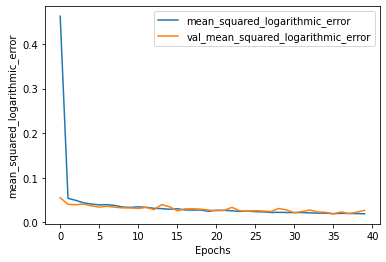

In [204]:
plot_history(history, 'mean_squared_logarithmic_error')

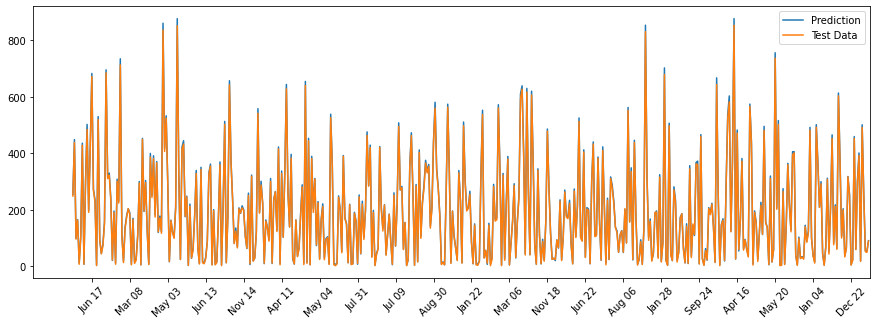

In [205]:
# Over Test features

fig, ax = plt.subplots(figsize=(15,5))

predictions = model.predict(test_features)
ax.plot(predictions, label='Prediction')
ax.plot(test_targets.values, label='Test Data')
ax.set_xlim(right=len(predictions))
ax.legend()

dates = pd.to_datetime(rides.iloc[test_data.index]['dteday'])
dates = dates.apply(lambda d: d.strftime('%b %d'))
ax.set_xticks(np.arange(len(dates))[12::24])
_ = ax.set_xticklabels(dates[12::24], rotation=45)

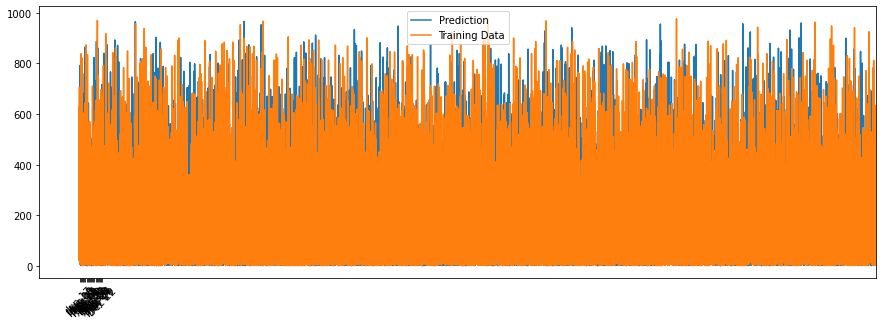

In [206]:
# Over Train features

fig, ax = plt.subplots(figsize=(15,5))

training_datas = one
ax.plot(training_datas, label='Prediction')
ax.plot(targets.values, label='Training Data')
ax.set_xlim(right=len(training_datas))
ax.legend()

dates = pd.to_datetime(rides.iloc[test_data.index]['dteday'])
dates = dates.apply(lambda d: d.strftime('%b %d'))
ax.set_xticks(np.arange(len(dates))[12::24])
_ = ax.set_xticklabels(dates[12::24], rotation=45)